In [1]:
# Importing libraries
%matplotlib inline
import os
import numpy                   as np
import pandas                  as pd
import matplotlib              as pl
import seaborn                 as sns
from  sklearn.model_selection  import train_test_split
from  sklearn.tree             import DecisionTreeClassifier
from  sklearn.neural_network    import MLPClassifier
from  sklearn.metrics          import accuracy_score
from  sklearn                  import tree

# Análise Exploratória

Visando entender melhor o problema, vamos explorar o conjunto de dados e criar algumas visualizações que permitam um melhor entendimento sobre suas principais características. Basicamente, nessa etapa temos o objetivo de checar se as características gerais dos dados estão de acordo com o que é descrito na literatura e também pretendemos gerar *insights* que ajudem a entender melhor os modelos de classificação que vamos criar na etapa seguinte.


Primeiro, vamos começar lendo o conjunto de dados e definindo o nome correto para suas colunas. Além disso, vamos criar dois conjuntos de dados para auxiliar na criação das visualizações, um contendo apenas variáveis discretas/categóricas e outro com as variáveis contínuas.

In [2]:
## Reading .csv files
df = pd.read_csv("data/corrected.csv",sep=',',header=None)

## Defining columns
col_names  = pd.read_csv("data/column_names.csv",sep=',',header=None)[0].values
df.columns = col_names


## Identifying columns as categorical or not
categorical_columns = ["protocol_type","service","flag","land","logged_in","root_shell","su_attempted",
                       "is_host_login","is_guest_login","label"]

df_categorical      = df[categorical_columns]
df_non_categorical  = df.drop(categorical_columns, axis=1)

Podemos perceber que ao analisar a média e o desvio padrão das variáveis não é possível extrair muita informação útil além do fato de notar uma alta variância em quase todas as features, o que mostra que os fluxos de rede coletados são bastante heterogêneos.

In [3]:
## A glance at the non categorical data
df_non_categorical.describe()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,311029.000000,3.110290e+05,3.110290e+05,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,...,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000
mean,17.902736,1.731702e+03,7.479937e+02,0.000762,0.000051,0.014677,0.002363,0.011243,0.008359,0.000958,...,235.282681,199.193914,0.793494,0.024953,0.547919,0.004566,0.058764,0.058791,0.142659,0.141693
std,407.644400,1.276567e+05,1.612018e+04,0.040367,0.009821,0.312068,0.049990,1.958325,2.165196,0.193119,...,60.913298,100.306470,0.387090,0.096003,0.491963,0.035773,0.231296,0.232997,0.344380,0.346573
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.050000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,244.000000,0.970000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,57715.000000,6.282565e+07,5.203179e+06,3.000000,3.000000,101.000000,4.000000,796.000000,878.000000,100.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Análise de variáveis discretas


### Relação entre Ataques e Serviços de Rede

Vamos começar analisando a relação entre o serviço de rede utilizado pelo destino dos pacotes e os ataques identificados. Para tal, vamos plotar um gráfico de barras que mostra o percentual de participação de cada serviço de rede em cada ataque.

**De modo a facilitar a visualização, vamos considerar apenas ataques que representem ao menos 1% do percentual total de ataques ou tipos de serviço de rede.**



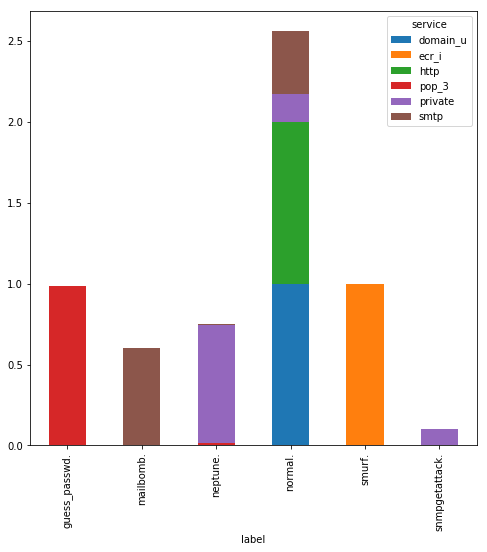

In [4]:
## Create a subset of main dataset (f_data) that contains only services and labels that represents at
## least 1% of the total cases

f_services = pd.crosstab(index=df["service"],columns="count")
f_services = f_services/len(df)
f_services = f_services[f_services["count"] > 0.01]

f_attacks = pd.crosstab(index=df["label"],columns="count")
f_attacks = f_attacks/len(df)
f_attacks = f_attacks[f_attacks["count"] > 0.01]

f_data = df[df['service'].isin(list(f_services.index))]
f_data = f_data[f_data['label'].isin(list(f_attacks.index))]

## Create the plot

attack_data = pd.crosstab(index = f_data["label"], columns=f_data["service"])
frequency_table_attack = (attack_data/attack_data.sum())

frequency_table_attack.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True);

Através do gráfico acima já é possível conhecer algumas características importantes dos dados, tais quais os principais tipos de ataque presente e de protocolo de serviço utilizados.

Vemos que claramente a maior parte do fluxo de rede presente no conjunto de dados é caracterizada como ¨normal¨, ou seja, um fluxo de rede sem nenhum tipo de atividade maliciosa detectada. Além disso, **os principais ataques que estão presentes nos dados são SYN Flooad (Neptune),guess_passord, mailbomb e Smurf.**

### Relação entre Ataques e Tipos de Protocolo

Utilizando a mesma abordagem anterior, iremos avaliar o percentual de participcação de cada protocolo de rede em cada tipo de ataque.

O objetivo desse análise é visualziar se existe alguma característica que foge do conhecido pela literatura.

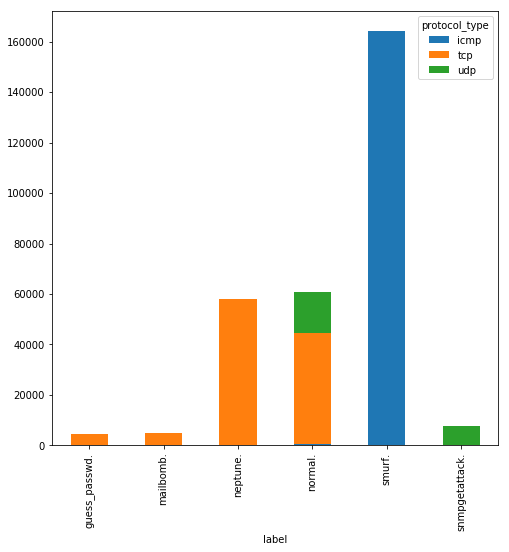

In [5]:
## Create a subset of main dataset (f_data) that contains only protocols and labels that represents at
## least 1% of the total cases

f_protocol = pd.crosstab(index=df["protocol_type"],columns="count")
f_protocol = f_protocol/len(df)
f_protocol = f_protocol[f_protocol["count"] > 0.01]

f_data = df[df['protocol_type'].isin(list(f_protocol.index))]
f_data = f_data[f_data['label'].isin(list(f_attacks.index))]

## Create a Two-Way Table

relationship_protocoal_attack = pd.crosstab(index=f_data["label"], 
                          columns=f_data["protocol_type"])
## Plot the Two-Way Table
relationship_protocoal_attack.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True);

Como já era esperado pelo conhecimento da literatura, ataques do tipo SYN Flooad (Neptune) ocorreram em redes com protocolo TCP e ataques Smurf em redes ICMP.Também podemos notar que os ataques do tipo SNMP foram feitos exclusivamente em redes que utizam UDP.

### Participação percentual de cada tipo de protocolo de rede

O gráfico abaixo visa dar uma visão geral da participação de cada tipo de protocolo na rede na qual os dados foram coletados.

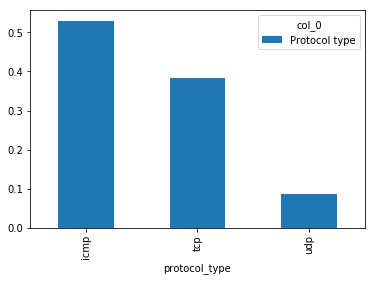

In [6]:
## Create a cross tab dataframe
protocol_data = pd.crosstab(index = df["protocol_type"],columns="Protocol type")
frequency_table_protocol = (protocol_data/protocol_data.sum())

## Plot the dataframe
frequency_table_protocol.plot.bar();

## Análise de variáveis contínuas

### Análise dos usuários logados no sistema

Julgamos interessante avaliar o padrão de comportamento dos usuários que de alguma forma estão logados na rede. Dessa forma, iremos criar gráficos que analisam se alguma ameaça foi detectada para os seguintes tipos de usuários:

- usuários logados como convidados;
- usuários na lista de ¨hot¨.

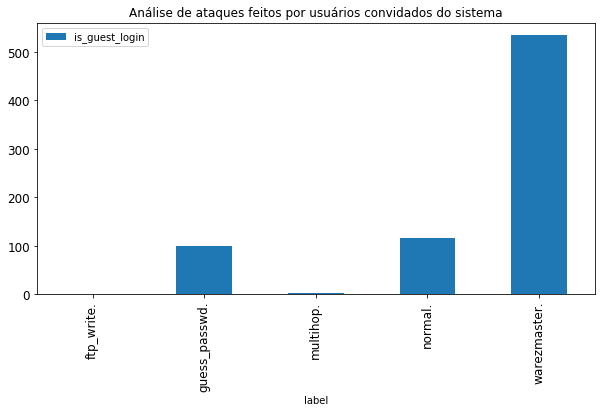

In [8]:
df_temp = df[["is_guest_login","label"]]
df_temp = df_temp.loc[df_temp['is_guest_login'] == 1]
df_temp.groupby(["label"]).count().plot(kind='bar', title ="Análise de ataques feitos por usuários convidados do sistema", figsize=(10, 5), legend=True, fontsize=12)

**Podemos notar que todos os ataques identificados nessa categoria de usuários são do tipo R2L** *(remote to local)*.

Ataques desse tipo ocorrem quando um atacante tem a habilidadede enviar pacotes para uma máquina através da rede, mas não tem uma conta nessa máquina e explora alguma vulnerabilidade para ganhar acesso local como usuário da máquina. Ou seja, provavelmente esses ¨usuários convidados¨ identificados provavelmente tiveram seu login hackeado pelo atacante.

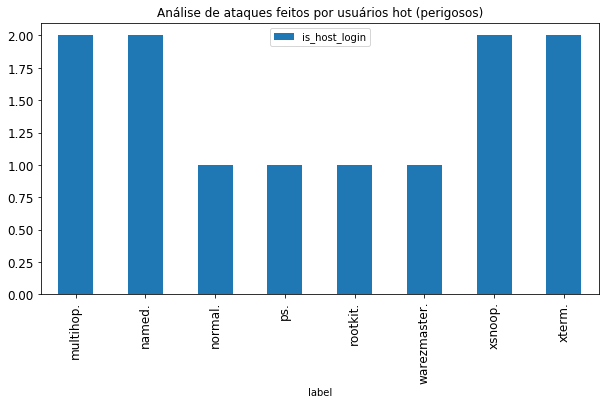

In [10]:
df_temp = df[["is_host_login","label"]]
df_temp = df_temp.loc[df_temp["is_host_login"] == 1]
df_temp.groupby(["label"]).count().plot(kind='bar', title ="Análise de ataques feitos por usuários hot (perigosos)", figsize=(10, 5), legend=True, fontsize=12)

Nesse caso temos também ataques do tipo **U2R** *(User to Root attack)*. Nesse caso o atacante acessa o sistema como usuário normal *(ganho por : sniffing password, um dicionário local ou engenharia social)* e passa a explorar vulnerabilidades para ganhar acesso como root ao sistema.


## Análise de dados redundantes

De acordo com Tavallaee (2009), o grande número de registros redundantes pode enviesar os classificadores para os registros mais frequentes. Desssa forma, o autor propõe um novo dataset, removendo as duplicatas. Dessa forma, analisaremos o dataset KDD99 completo e o sem as duplicatas. Para tal analisaremos a razão entre os dados únicos e os duplicados e plotaremos os gráficos de relação entre os ataques e serviços, e entre os ataques e protocolos utilizados.

In [8]:
# Removing dupicates
df_no_duplicates = df.drop_duplicates()
percentage = 1 - float(df_no_duplicates["protocol_type"].count())/float(df["protocol_type"].count())
print("\n O dataset sem duplicatas é {}% menor que o dataset original,".format(round(percentage * 100,2)))


 O dataset sem duplicatas é 75.15% menor que o dataset original,


# Modelos de classificação

Antes de executar nossos modelos, vamos realizar algumas modificações em nosso conjunto de dados. São elas:

- Transformar categorias que são strings em categorias numéricas 
- Atribuir uma categoria binária de ataque ou não ataque para cada um dos resgitros
- Criar um conjunto de dados para treino e outro para teste e validação dos modelos, usando a proporção (0.8/02)

In [9]:
# Mapping strings categories to int

df_binary = df.copy()
df_binary.loc[df_binary.label != 'normal.','label']= 1
df_binary.loc[df_binary.label == 'normal.','label']= 0

df_binary_duplicates = df_no_duplicates.copy()
df_binary_duplicates.loc[df_binary_duplicates.label != 'normal.','label']= 1
df_binary_duplicates.loc[df_binary_duplicates.label == 'normal.','label']= 0


c1 = df_binary.protocol_type.unique()
c2 = df_binary.service.unique()
c3 = df_binary.flag.unique()

d_protocol = {}
d_service = {}
d_wtver = {}

for i in range(len(c1)):
    d_protocol[c1[i]] = i

for i in range(len(c2)):
    d_service[c2[i]] = i
    
for i in range(len(c3)):
    d_wtver[c3[i]] = i

    
for i in d_protocol:
    df_binary        = df_binary.replace(i, d_protocol[i])
    df_binary_duplicates = df_binary_duplicates.replace(i, d_protocol[i])
    df_no_duplicates = df_no_duplicates.replace(i, d_protocol[i])
    df               = df.replace(i, d_protocol[i])
for i in d_service:
    df_binary        = df_binary.replace(i, d_service[i])
    df_binary_duplicates = df_binary_duplicates.replace(i, d_service[i])
    df_no_duplicates = df_no_duplicates.replace(i, d_service[i])
    df               = df.replace(i, d_service[i])
for i in d_wtver:
    df_binary        = df_binary.replace(i, d_wtver[i])
    df_binary_duplicates = df_binary_duplicates.replace(i, d_wtver[i])
    df_no_duplicates = df_no_duplicates.replace(i, d_wtver[i])
    df               = df.replace(i, d_wtver[i])

import random
random.seed(1610)

## Split the data in train and test datasets (with duplicates)

df_b = df_binary.copy()
y_b = pd.factorize(df_b['label'])[0]
df_b = df_b.drop('label', 1)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(df_b, y_b, test_size=0.2, random_state=42)


## Split the data in train and test datasets (without duplicates)
df_b_nd = df_binary_duplicates.copy()
y_b_nd = pd.factorize(df_b_nd['label'])[0]
df_b_nd = df_b_nd.drop('label', 1)
X_train_bnd, X_test_bnd, y_train_bnd, y_test_bnd = train_test_split(df_b_nd, y_b_nd, test_size=0.2, random_state=42)


# Dataset (non binary) with duplicates

df_temp = df.copy()
y = df_temp['label']
df_temp = df_temp.drop('label', 1)
X_train, X_test, y_train, y_test = train_test_split(df_temp, y, test_size=0.2, random_state=42)

# Dataset (non binary) without duplicates

df_nd  = df_no_duplicates.copy()
y_nd = df_nd['label']
df_nd = df_nd.drop('label', 1)
X_train_nd, X_test_nd, y_train_nd, y_test_nd = train_test_split(df_nd , y_nd, test_size=0.2, random_state=42)

models = [{"name":"Binario com duplicatas","X":X_train_b,"Y":y_train_b,"X_test":X_test_b,"Y_test":y_test_b},
         {"name":"Binario sem duplicatas","X":X_train_bnd,"Y":y_train_bnd,"X_test":X_test_bnd,"Y_test":y_test_bnd},
         {"name":"Nao binario com duplicatas","X":X_train,"Y":y_train,"X_test":X_test,"Y_test":y_test},
         {"name":"Nao binario sem duplicatas","X":X_train_nd,"Y":y_train_nd,"X_test":X_test_nd,"Y_test":y_test_nd}]

## Naives Bayes

O primeiro modelo que iremos testar para a classificação é o Naives Bayes. Esse modelo é baseado no Teorema de Bayes e faz a suposição que todas as variáveis são independentes entre si, o que nós não acreditamos que seja uma verdade. Visto isso, é esperado que esse seja o modelo que alcance o pior desempenho destre todos que iremos testar.

In [40]:
from sklearn.naive_bayes import GaussianNB
for model in models:
    gnb = GaussianNB()
    gnb.fit(model["X"],model["Y"])
    print("A acurácia do modelo {} foi de: {}".format(model["name"],gnb.score(model["X_test"],model["Y_test"])))

A acurácia do modelo Binario com duplicatas foi de: 0.925602031958332
A acurácia do modelo Binario sem duplicatas foi de: 0.9102788019923669
A acurácia do modelo Nao binario com duplicatas foi de: 0.922049320001286
A acurácia do modelo Nao binario sem duplicatas foi de: 0.7737240442460702


## Multilayer Perceptron

In [46]:
for model in models:
    clf_mlp = MLPClassifier(solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
    clf_mlp.fit(model["X"],model["Y"])
    print("A acurácia do modelo {} foi de: {}".format(model["name"],clf_mlp.score(model["X_test"],model["Y_test"])))

A acurácia do modelo Binario com duplicatas foi de: 0.9322894897598303
A acurácia do modelo Binario sem duplicatas foi de: 0.9169415874248011
A acurácia do modelo Nao binario com duplicatas foi de: 0.7194482847313763
A acurácia do modelo Nao binario sem duplicatas foi de: 0.9291674752571317


## Modelos baseados em Gini vs Modelos baseados em Entropia

Os algoritmos para construir árvores de regressão geralmente utilizam uma abordagem do tipo *top-down*, escolhendo a cada passo uma variável para separar os dados em novos subconjuntos e por fim em classes. Diferentes algoritmos utilizam diferentes métricas para definir qual é a melhor variável para dividir os dados em um novo subcojunto e são exatamente essas métricas que desejamos explorar nessa secção. 

Iremos testar dois tipos de modelo de árvore de regressão, baseadas na métrica de Gini e na métrica de Entropia. Dessa forma, vamos explicar brevemente como é calculada cada uma dessas medidas e quais são suas principais diferencças.

#### Gini Impurity

$$\textit{Gini}: \mathit{Gini}(E) = 1 - \sum_{j=1}^{c}p_j^2$$

Esse é um índice muito utilizado na área de economia, principalmente para avaliar a desigualdade social de um país. Ele basicamente avalia a quantidade de valores que foi classificado de maneira correta em cada classe em cada umas das possibilidades de divisão dispoíveis. Feito isso ele calcula o índice para cada uma das novas subdivisões e pondera pelo número de elementos que foi atribuído a cada uma delas.

![](imagens/m-gini.png?raw=true)

#### Função de ganho de informação


Essa medida se baseia no conceito de **entropia** de Teoria a Informação. A implementação de árvore utilizando essa métrica é tão conhecida que recebeu um nome próprio, C.45. Para cada nó da árvore o valor de informação representa ¨a quantidade esperada de informação que seria necessária para classificar qualquer novo dado como *sim* ou *não*, dado que esse dado chegou até o nó atual na árvore¨. Basicamente, queremos dividir nossa árvore até que essa quantidade de informação seja zero.

Nossa função de entropia é:

$$\textit{Entropy}: H(E) = -\sum_{j=1}^{c}p_j\log p_j$$

E a função de ganho de informação é dada por:

$$IG(E,a) = H(E) - H(E|a)$$

Dados esses esclarecimentos, vamos testar os dois modelos que se utilizam desse conceito: Florestas Aleatórias e Árvores de Decisão.

## Random Forest

O modelo de Florestas aleatórias nada mais é do que um conjunto de Árvores de Regressão criadas com a escolha dos parâmetros de divisão feita de maneira aleatória e que em conjunto votam para a criação de uma ¨arvore final¨ de decisão.

Este é um dos modelos mais usados na área de Machine Learning na atualidade e em grande parte dos casos o que obtém o melhor custo benefício entre resultado/tempo e poder computacional despendido.


![](imagens/random-forest.png?raw=true)

In [18]:
from sklearn.ensemble import RandomForestClassifier
rd_array = []
for i in range(len(models)):
    randomForest = RandomForestClassifier(criterion  = "entropy")
    rd_array.append(randomForest.fit(models[i]["X"],models[i]["Y"]))

In [20]:
# import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
for j in range(len(models)):
    featuresImportance = {}
    for i in range(len(df.columns[:len(df.columns)-1])):
        featuresImportance[df.columns[:len(df.columns)-1][i]] = rd_array[j].feature_importances_[i]

    s = [(k, featuresImportance[k]) for k in sorted(featuresImportance, key=featuresImportance.get, reverse=True)]

    print("As 5 features mais relevantes para o modelo %s foram: \n"% (models[j]["name"])) 
    for i in range (5):
        print("%s, com influência: %s" % (s[i][0],s[i][1]))

    print("\nA acurácia do modelo foi de: {} \n".format(rd_array[j].score(models[j]["X_test"], models[j]["Y_test"])))
    if(j <= 1):
        tn, fp, fn, tp = confusion_matrix(models[j]["Y_test"], rd_array[j].predict(models[j]["X_test"])).ravel()
        print("O recall e: {}".format(tp/(tp+fn)))
        print("A precisao e: {}".format(tp/(tp+fp)))
        print("\n ------------------------------------\n")
    

As 5 features mais relevantes para o modelo Binario com duplicatas foram: 

dst_bytes, com influência: 0.210019702715
service, com influência: 0.179275968538
dst_host_same_src_port_rate, com influência: 0.0815457861104
src_bytes, com influência: 0.0812298917064
protocol_type, com influência: 0.0728611217154

A acurácia do modelo foi de: 0.9813522811304376 

O recall e: 0.98868570973268
A precisao e: 0.9882132759925139

 ------------------------------------

As 5 features mais relevantes para o modelo Binario sem duplicatas foram: 

src_bytes, com influência: 0.215177061193
logged_in, com influência: 0.114604231687
service, com influência: 0.104106376556
dst_host_diff_srv_rate, com influência: 0.0765939879337
dst_host_rerror_rate, com influência: 0.0672906288924

A acurácia do modelo foi de: 0.995407206158225 

O recall e: 0.9936539746158984
A precisao e: 0.9944843723884339

 ------------------------------------

As 5 features mais relevantes para o modelo Nao binario com duplicatas for

Nesse caso, os resultados utilizando as métricas de Gini e Entropia foram praticamente idênticos, dessa forma decidimos omitir os resutados obtidos por Gini de modo a não poluir esse relatório *(para visualizá-los para ir no bloco 18 e mudar de ¨entropy¨ para ¨gini¨)*.

Em primeiro lugar, podemos perceber que a acurácia foi bastante elevada em todos os casos e acabou subindo no modelo sem duplicatas, provavelmente pela redução de *overfitting* em algum nível. Como a acurácia resultou em um valor extremamente preciso, recorremos ao Recall e a Precisão para verificar se nossos resultados eram válidos. Ambos os indicadores sinalizaram de maneira positiva.

Podemos notar também que, apesar de variações na ordem, algumas variáveis se mostraram importantes para a divisão em todos os casos, sendo as com mais destaque ¨service¨, ¨flag¨ e ¨src_bytes¨. Isso vai ao encontro com o que havíamos encontrado na análise exploratória, que mostrava que os ataques mais comuns nessa rede eram SYN Flood e Smurf.

## Árvores de Decisão

In [13]:
for model in models:
    clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=5, min_samples_leaf=5)
    clf_gini.fit(model["X"],model["Y"])
    print("A acurácia do modelo {} foi de: {}".format(model["name"],clf_gini.score(model["X_test"],model["Y_test"])))

A acurácia do modelo Binario com duplicatas foi de: 0.9589428672475324
A acurácia do modelo Binario sem duplicatas foi de: 0.9877094249304612
A acurácia do modelo Nao binario com duplicatas foi de: 0.9470629842780439
A acurácia do modelo Nao binario sem duplicatas foi de: 0.9605407853030598


In [14]:
for model in models:
    clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=5, min_samples_leaf=5)
    clf_entropy.fit(model["X"],model["Y"])
    print("A acurácia do modelo {} foi de: {}".format(model["name"],clf_entropy.score(model["X_test"],model["Y_test"])))

A acurácia do modelo Binario com duplicatas foi de: 0.959232228402405
A acurácia do modelo Binario sem duplicatas foi de: 0.9869978653211722
A acurácia do modelo Nao binario com duplicatas foi de: 0.956949490402855
A acurácia do modelo Nao binario sem duplicatas foi de: 0.966621385600621


In [15]:
#Export as .dot
names = col_names[:len(col_names)-1]
tree.export_graphviz(clf_gini, out_file='tree_gini.dot',feature_names = names,class_names = df.label.unique(),filled = True)
success = os.system("dot -Tpng tree_gini.dot -o tree_gini.png")
tree.export_graphviz(clf_entropy, out_file='tree_entropy.dot',feature_names = names,class_names = df.label.unique(),filled = True)
success = os.system("dot -Tpng tree_entropy.dot -o tree_entropy.png")

### Árvore de decisão usando o critério "gini"
![DecisionTree Gini](tree_gini.png "DecisionTree Gini")
### Árvore de decisão usando o critério "entropy" 
![DecisionTree Entropy](tree_entropy.png "DecisionTree Entropy")

### Análise das Árvores de Decisão do dataset com duplicatas e não binarizado

Vamos adotar analisar cada uma das árvores separadamente e depois atribuir um parecer sobre suas diferenças e semelhanças. Começaremos pela árvore que utiliza pela métrica de Gini, para logo após analisar a árvore de regressão que utiliza como métrica a função de ganho.

#### Análise da árvore de decisão usando Gini

O primeiro ponto importante a se notar é a raíz dessa árvore. Nesse caso, temos que a variável utilizada para maximizar a subdivisão em dois novos grupos é a variável **flag**, que indica o status de erro identificado na conexão. Essa variável foi transformada de string para numérica para aplicarmos os modelos, a relação atribuída foi:

{'OTH': 10,'REJ': 3,'RSTO': 5,'RSTOS0': 8,'RSTR': 1,'S0': 6,'S1': 2,'S2': 7,'S3': 4,'SF': 0,'SH': 9}

Ainda, o significado de cada um desses status é:

![](imagens/flags.png?raw=true)

Ou seja, ao separar os novos grupos de acordo com uma divisão por valores de flasg menores iguais a 2.5 o que o algoritmo está fazendo é tentando separar as conexões que foram estabelecidas e terminadas normalmente das demais. A classe que foi atribuída foi a **udpstorm**, uma classe que possui somente duas aparciçoẽs no dataset, portanto não conseguimos compreender o motivo dela ter sido a escolhida. Nossa expectativas era que a classificação da raíz fosse ¨normal¨, pois é a classificação que mais aparece.

Algumas comparações interessantes com o que estudamos na matéria podem ser vistas, por exemplo, na ramificação que divide entre as classificações de **¨buffer_overflow¨ e ¨mscan¨**. Enquanto o buffer overflow é um ataque que explora o fato de quando o buffer estar cheio as informações irem para a pilha e se aproveita para manipular essas informações, o mscan funciona de forma semelhante a um port scan, no sentido de procurar máquinas com vulnerabilidades para um possível futuro ataque. É interessante notar que a variável escolhida para dividir os dados entre esses dois dados foi a **srv_diff_host_rate**, que siginifica a percentagem de coexões feitas para o mesmo serviço e hosts diferentes. Se essa porcentagem for menor que 0.35 classificamos como ¨mscan¨, que pode ser devido ao fato do mscan ter essa porcentagem por natureza menor em consequência a ele ¨testar¨ diversos serviços distintos para avaliar possíveis vulnerabilidades.

Outro aspecto interessante da árvore que podemos traçar um paralelo com o conteúdo cisto em aula é a divisão dos dados entre as categorias **¨smurf¨ e ¨ftpwrite¨**. Ao passo que o smurf é um ataque de DDoS o FTP Write se dá pelo aproveitamento por parte do atacante de uma configuração errada de FTP *(permitindo que ele adicione e remova novos arquivos)*. De acordo com a árvore de decisão, se é identificado em um elemento que estava sendo classificado como ataque Smurf que ele possui **duração de conexão** maior que 279 segundos ele passa a ser classificado como ataque FTP Write. Imaginamos que isso pode ser devido ao fato que um atacante que faz FTP Write pode precisar de mais tempo para, por exemplo, fazer upload de um arquivo malicioso e o configurar na máquina infectada.

#### Análise da árvore de decisão usando entropia

A árvore de decisão utilizando entropia foi em diversos aspectos parecida com a árvore gerada quando utilizamos a métrica de Gini. Contudo, uma diferença que ficou clara foi que, utilizando a mesma profundidade de árvore, ela acabou conseguindo classificar ataques diferentes. Por exemplo, os tipos de ataque ¨back¨ e ¨xterm¨ só aparecem na árvore criada por Entropia, enquanto os ataques ¨Saint¨ e ¨nmap¨ só aparecem usando Gini.

Podemos ter um insight interessante ao analisar o nó que divide ataques do tipo ¨apache2¨ e ¨buffer overflow¨ nessa árvore. Enquanto o apache2 configura um ataque de negação se serviço contra um server web ataque o buffer overflow, como já explicado, se aproveita da manipulação dos dados que cairam em overflow e foram para a stack. O interessante é notar que a variável que dividiu esses dois grupos foi a **¨same_srv_rate¨, que mede a porcentagem des conexões para o mesmo serviço**. O ataque apache2 tende a ter menos conexṍes para o mesmo serviço, uma vez que o buffer overflow precisa sempre se conectar ao mesmo serviço para agilizar que aconteza overflow.